In [4]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

In [8]:
# download dataframe
DAX = web.get_data_yahoo("DAX", start="2000-01-01")

[*********************100%***********************]  1 of 1 downloaded


In [9]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 976 entries, 2014-10-23 to 2018-09-07
Data columns (total 6 columns):
Open         976 non-null float64
High         976 non-null float64
Low          976 non-null float64
Close        976 non-null float64
Adj Close    976 non-null float64
Volume       976 non-null int64
dtypes: float64(5), int64(1)
memory usage: 53.4 KB


In [10]:
print DAX.tail()
#matplotlib inline
DAX['Close'].plot(figsize=(8,5))

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-08-31  28.809999  28.809999  28.450001  28.450001  28.450001    9000
2018-09-04  28.240000  28.273001  28.139999  28.273001  28.273001    2700
2018-09-05  28.190001  28.190001  28.027000  28.037001  28.037001    1200
2018-09-06  28.017000  28.017000  27.750000  27.760000  27.760000    1300
2018-09-07  27.629999  27.629999  27.500000  27.570000  27.570000    1700


In [11]:
%%time
DAX['Ret_Loop'] = 0.0 # create a column of 0's
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i-1])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 26.1 s, sys: 0 ns, total: 26.1 s
Wall time: 26 s


In [13]:
# vectorized for less time
%time
DAX['Return'] = np.log(DAX['Close']/ DAX['Close'].shift(1))
DAX['Return'].tail()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


Date
2018-08-31   -0.024993
2018-09-04   -0.006241
2018-09-05   -0.008382
2018-09-06   -0.009929
2018-09-07   -0.006868
Name: Return, dtype: float64

In [14]:
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7091297b10>,
      dtype=object)

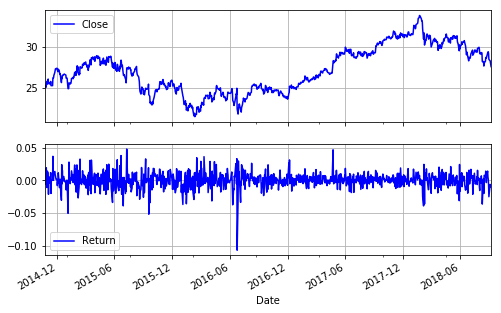

In [15]:
DAX[['Close','Return']].plot(subplots=True, style='b', figsize=(8,5), grid=True)

In [16]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)
DAX[['Close', '42d', '252d']].tail()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  


,Close,42d,252d
Date,,,
2018-08-31,28.450001,29.071453,30.657357
2018-09-04,28.273001,29.050857,30.653389
2018-09-05,28.037001,29.022691,30.648536
2018-09-06,27.760000,28.982929,30.640818
2018-09-07,27.570000,28.935024,30.630818


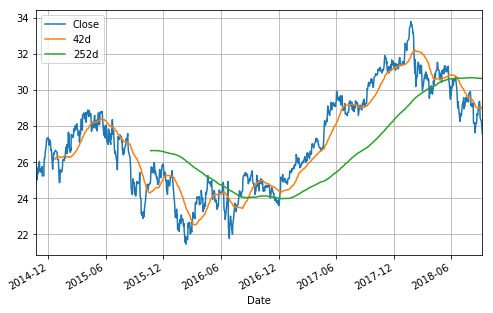

In [17]:
# a typical stock price chart with the two trends
DAX[['Close', '42d', '252d']].plot(figsize=(8,5), grid=True)

In [18]:
# the moving historical standard deviation of the lof return 
# i.e. the moving historical velocity
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'], window=252) * math.sqrt(252)
DAX['Mov_Vol'].tail()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  after removing the cwd from sys.path.


Date
2018-08-31    0.154983
2018-09-04    0.155033
2018-09-05    0.155252
2018-09-06    0.154798
2018-09-07    0.154373
Name: Mov_Vol, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f70ac18f210>,
      dtype=object)

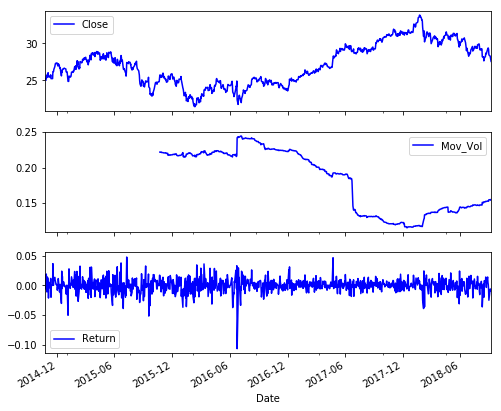

In [24]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,7))